# **Description**

**Introduction:**

The Predicting Divorce Likelihood Using Socio-Behavioral Data project applies machine learning techniques to predict divorce outcomes based on various socio-behavioral factors such as communication patterns, conflict resolution strategies, and relationship dynamics. The project will compare the effectiveness of machine learning models with traditional statistical approaches and explore how explainable AI methods, such as SHAP, can enhance model interpretability. Additionally, it will investigate the role of data imbalance in affecting the trade-off between false positives and false negatives, with a focus on improving predictive accuracy in imbalanced datasets.

**Research Questions:**

1. How accurately can machine learning models predict divorce likelihood, and how do they compare to traditional statistical methods?

2. Which socio-behavioral attributes (such as communication and conflict resolution) are most influential in predicting divorce, and how can explainable AI techniques, like SHAP analysis, help interpret these relationships?

3. How can data imbalance be effectively handled in predictive models to balance false positives and false negatives, particularly in the context of divorce prediction?

**Dataset Details:**

**Name:** Divorce Predictors Dataset

**Source:** UCI Machine Learning Repository - Divorce Predictors Dataset

**Contributors:** The dataset was created and published by Dr. S. Yöntem (2020) in Turkey, based on a socio-behavioral questionnaire inspired by the Gottman Couples Therapy Model. It contains responses from married couples, each answering 54 questions related to communication, conflict resolution, and relationship dynamics. The data is labeled with divorce outcomes: "divorced" or "not divorced."

# **Importing Files**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    roc_curve, roc_auc_score, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# **Loading Dataset**

In [ ]:
# Load the dataset
file_path = 'divorce.xlsx'
df = pd.read_excel(file_path)

# **Adjusting Columns Name**

In [ ]:
# Adjusting the simplified column names to have 54 elements to match the dataset's attributes
simplified_column_names = [
    "Apology", "Ignore Differences", "Correct Discussions", "Contact After Arguments", "Special Time", "No Time Together",
    "Strangers At Home", "Enjoy Holidays", "Enjoy Traveling", "Common Goals", "Future Harmony", "Personal Freedom",
    "Entertainment", "Shared Goals", "Shared Dreams", "Love Compatibility", "Happiness Views", "Marriage Views",
    "Role Views", "Trust Values", "Likes Knowledge", "Care Needs", "Favorite Food", "Stress Awareness",
    "Inner World Knowledge", "Basic Concerns", "Stress Sources", "Hopes and Wishes", "Deep Knowledge",
    "Friends Awareness", "Aggression", "Negative Language", "Offensive Language", "Insults", "Humiliation",
    "Uncalm Arguments", "Hate Discussion Style", "Sudden Fights", "Unclear Fights", "Break in Calm",
    "Silent Arguments", "Calming Desire", "Need to Leave", "Silent Instead of Arguing", "Avoid Upsetting",
    "Silent Out of Fear", "Feel Right", "Not Guilty", "No Fault", "Accusation", "Reminder of Faults",
    "Competence Reminder", "Disagreement", "Tolerance"
]

# Replace the column names in the dataframe
df.columns = simplified_column_names + ['Class']  # Adding 'Class' back as it's the target variable

**Print First Few Rows**

In [ ]:
df.head()

,Apology,Ignore Differences,Correct Discussions,Contact After Arguments,Special Time,No Time Together,Strangers At Home,Enjoy Holidays,Enjoy Traveling,Common Goals,...,Silent Out of Fear,Feel Right,Not Guilty,No Fault,Accusation,Reminder of Faults,Competence Reminder,Disagreement,Tolerance,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


# **Exploratory Data analysis**

**Printing the Shape of Dataset**

In [ ]:
df.shape

(170, 55)

In [ ]:
print("\nColumns in the dataset:")
df.columns


Columns in the dataset:


Index(['Apology', 'Ignore Differences', 'Correct Discussions',
       'Contact After Arguments', 'Special Time', 'No Time Together',
       'Strangers At Home', 'Enjoy Holidays', 'Enjoy Traveling',
       'Common Goals', 'Future Harmony', 'Personal Freedom', 'Entertainment',
       'Shared Goals', 'Shared Dreams', 'Love Compatibility',
       'Happiness Views', 'Marriage Views', 'Role Views', 'Trust Values',
       'Likes Knowledge', 'Care Needs', 'Favorite Food', 'Stress Awareness',
       'Inner World Knowledge', 'Basic Concerns', 'Stress Sources',
       'Hopes and Wishes', 'Deep Knowledge', 'Friends Awareness', 'Aggression',
       'Negative Language', 'Offensive Language', 'Insults', 'Humiliation',
       'Uncalm Arguments', 'Hate Discussion Style', 'Sudden Fights',
       'Unclear Fights', 'Break in Calm', 'Silent Arguments', 'Calming Desire',
       'Need to Leave', 'Silent Instead of Arguing', 'Avoid Upsetting',
       'Silent Out of Fear', 'Feel Right', 'Not Guilty', 'No Fault

# **Descriptive Statistical Analysis**

In [ ]:
print("\nDescriptive Statistics for Numerical Columns:")
df.describe()


Descriptive Statistics for Numerical Columns:


,Apology,Ignore Differences,Correct Discussions,Contact After Arguments,Special Time,No Time Together,Strangers At Home,Enjoy Holidays,Enjoy Traveling,Common Goals,...,Silent Out of Fear,Feel Right,Not Guilty,No Fault,Accusation,Reminder of Faults,Competence Reminder,Disagreement,Tolerance,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


**Distribution Graph of Target Class**

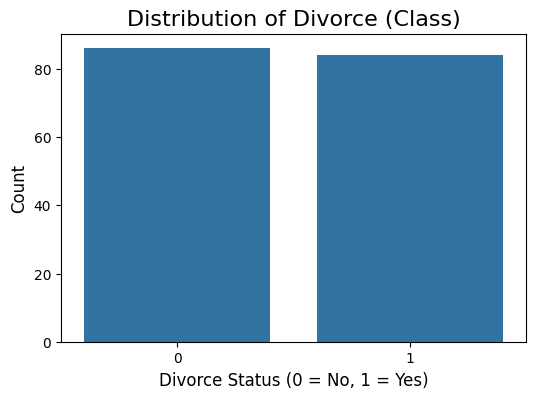

In [ ]:
# Create a count plot for the 'Class' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)

# Add title and labels
plt.title('Distribution of Divorce (Class)', fontsize=16)
plt.xlabel('Divorce Status (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()

**Checking Missing Values**

In [ ]:
# Checking for missing values
missing_data = df.isnull().sum()
print(missing_data)

Apology                      0
Ignore Differences           0
Correct Discussions          0
Contact After Arguments      0
Special Time                 0
No Time Together             0
Strangers At Home            0
Enjoy Holidays               0
Enjoy Traveling              0
Common Goals                 0
Future Harmony               0
Personal Freedom             0
Entertainment                0
Shared Goals                 0
Shared Dreams                0
Love Compatibility           0
Happiness Views              0
Marriage Views               0
Role Views                   0
Trust Values                 0
Likes Knowledge              0
Care Needs                   0
Favorite Food                0
Stress Awareness             0
Inner World Knowledge        0
Basic Concerns               0
Stress Sources               0
Hopes and Wishes             0
Deep Knowledge               0
Friends Awareness            0
Aggression                   0
Negative Language            0
Offensiv

# **Correlation Matrix**

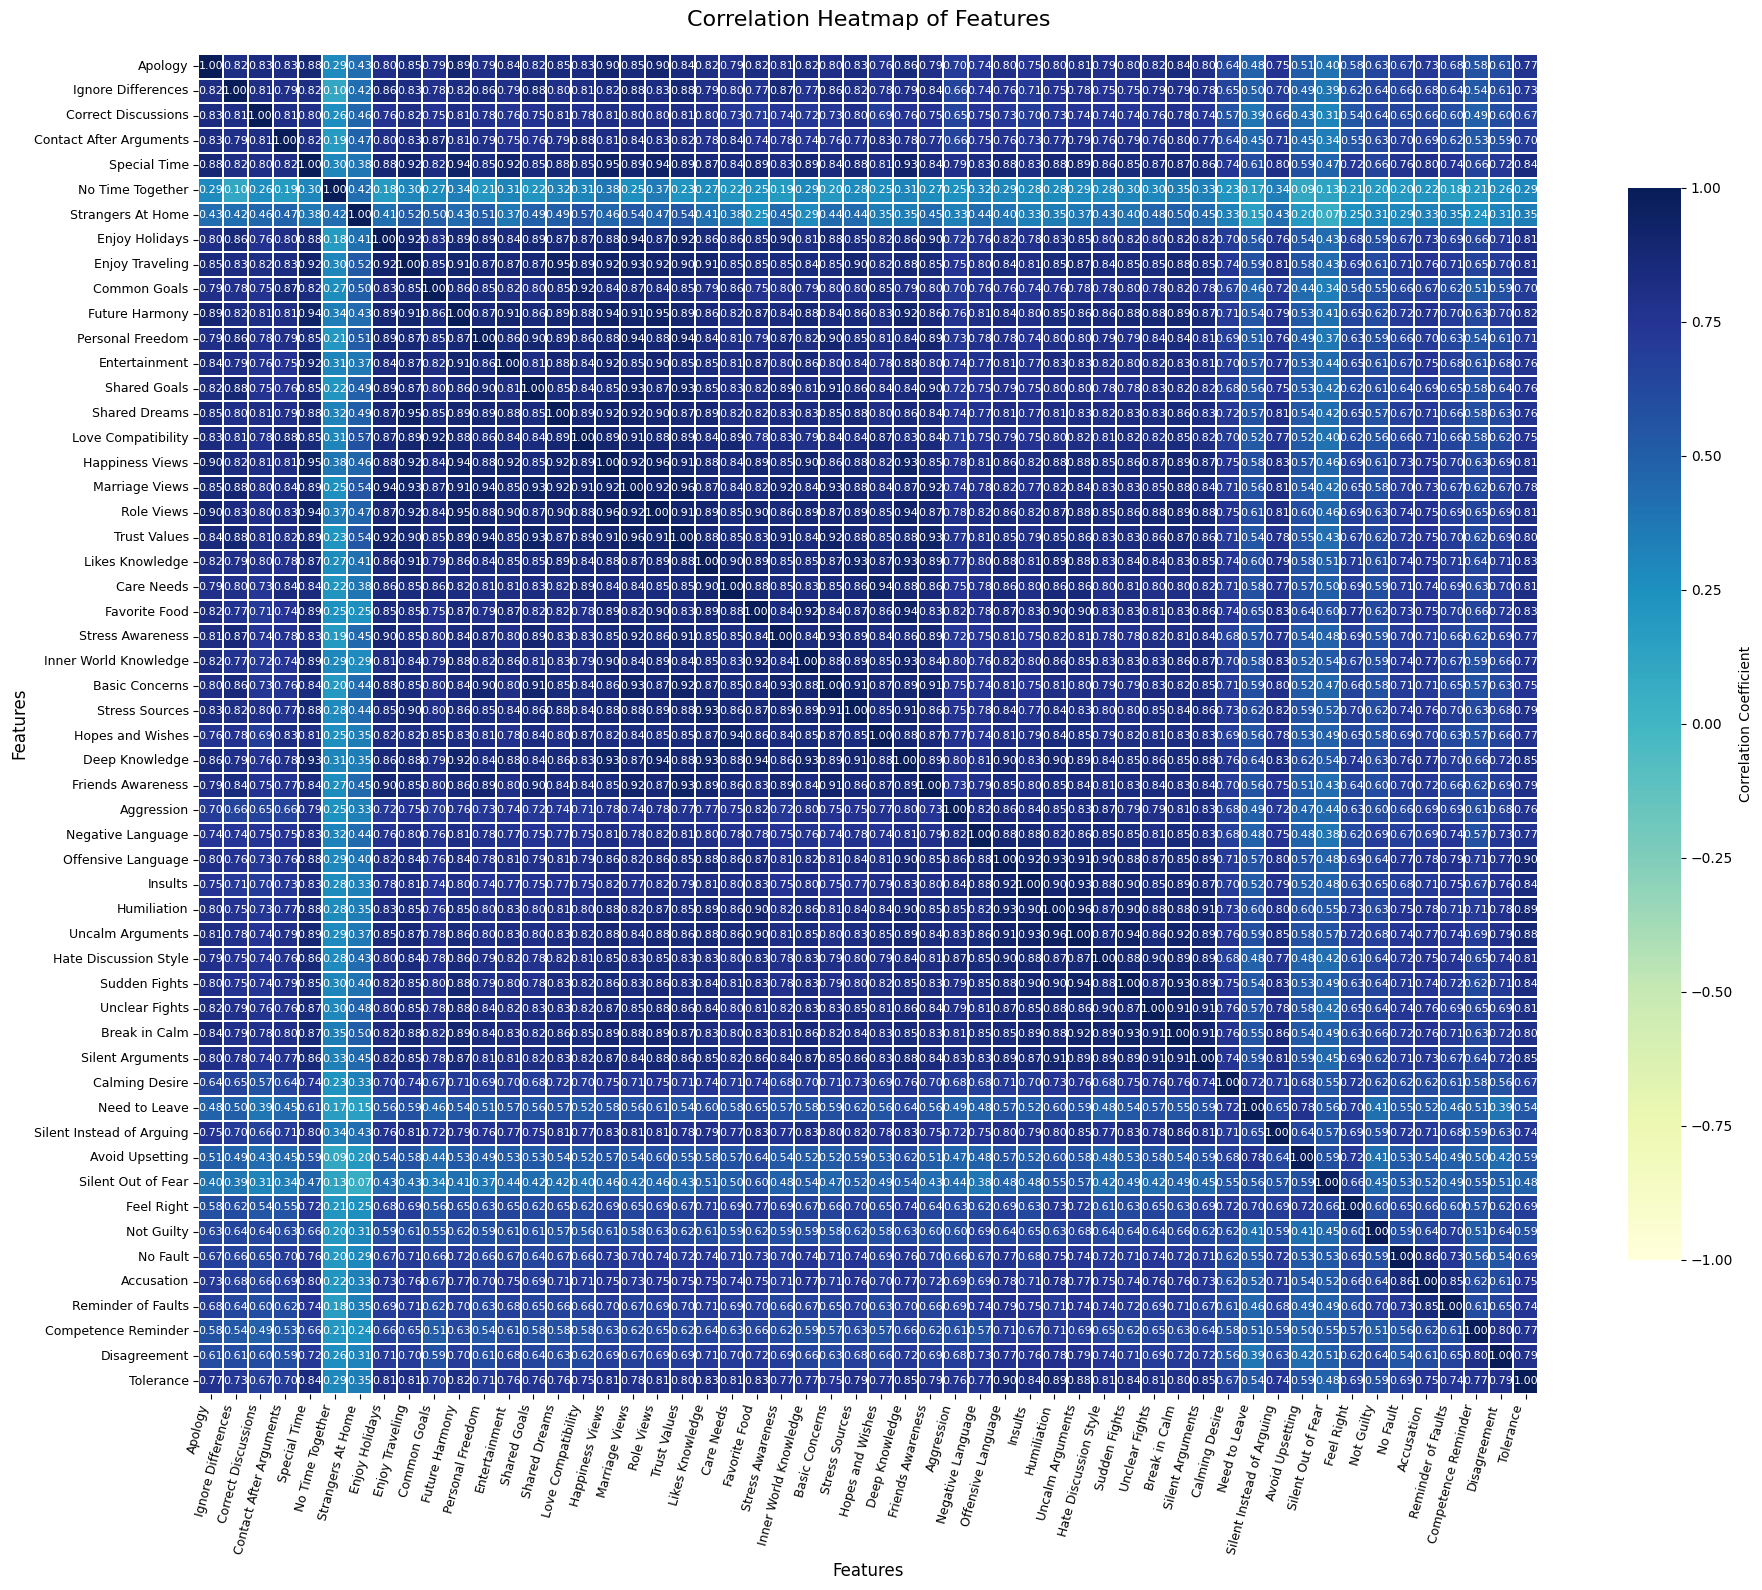

In [ ]:
# Calculate correlation matrix
corr_matrix = df.drop('Class', axis=1).corr(numeric_only=True)

# Set up the figure
plt.figure(figsize=(20, 16))

# Create heatmap with better readability
sns.heatmap(
    corr_matrix,
    cmap='YlGnBu',          # smooth gradient
    vmin=-1, vmax=1,        # full correlation range
    center=0,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
    linewidths=0.3,
    annot=True,              # show numbers
    fmt=".2f",               # two decimal places
    annot_kws={"size": 8},   # smaller text size
    square=True,
    xticklabels=True,
    yticklabels=True
)

# Rotate tick labels for clarity
plt.xticks(rotation=75, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)

# Add title and labels
plt.title("Correlation Heatmap of Features", fontsize=16, pad=20)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# **Identifying Top 10 Most Important Features based on Correlation**

In [ ]:
# Calculate the absolute correlation of each feature with the 'Class' variable
correlation_with_class = df.corr()['Class'].abs().sort_values(ascending=False)

# Drop the correlation of 'Class' with itself
correlation_with_class = correlation_with_class.drop('Class')

# Get the top 10 most correlated features
top_10_features = correlation_with_class.head(10)

print("Top 10 Most Important Features (based on absolute correlation with Class):")
print(top_10_features)

Top 10 Most Important Features (based on absolute correlation with Class):
Break in Calm       0.938684
Happiness Views     0.929346
Role Views          0.928627
Marriage Views      0.923208
Future Harmony      0.918386
Enjoy Traveling     0.912368
Trust Values        0.907008
Shared Dreams       0.901220
Unclear Fights      0.896180
Silent Arguments    0.894356
Name: Class, dtype: float64


# **Box plot on the 10 most important colom**

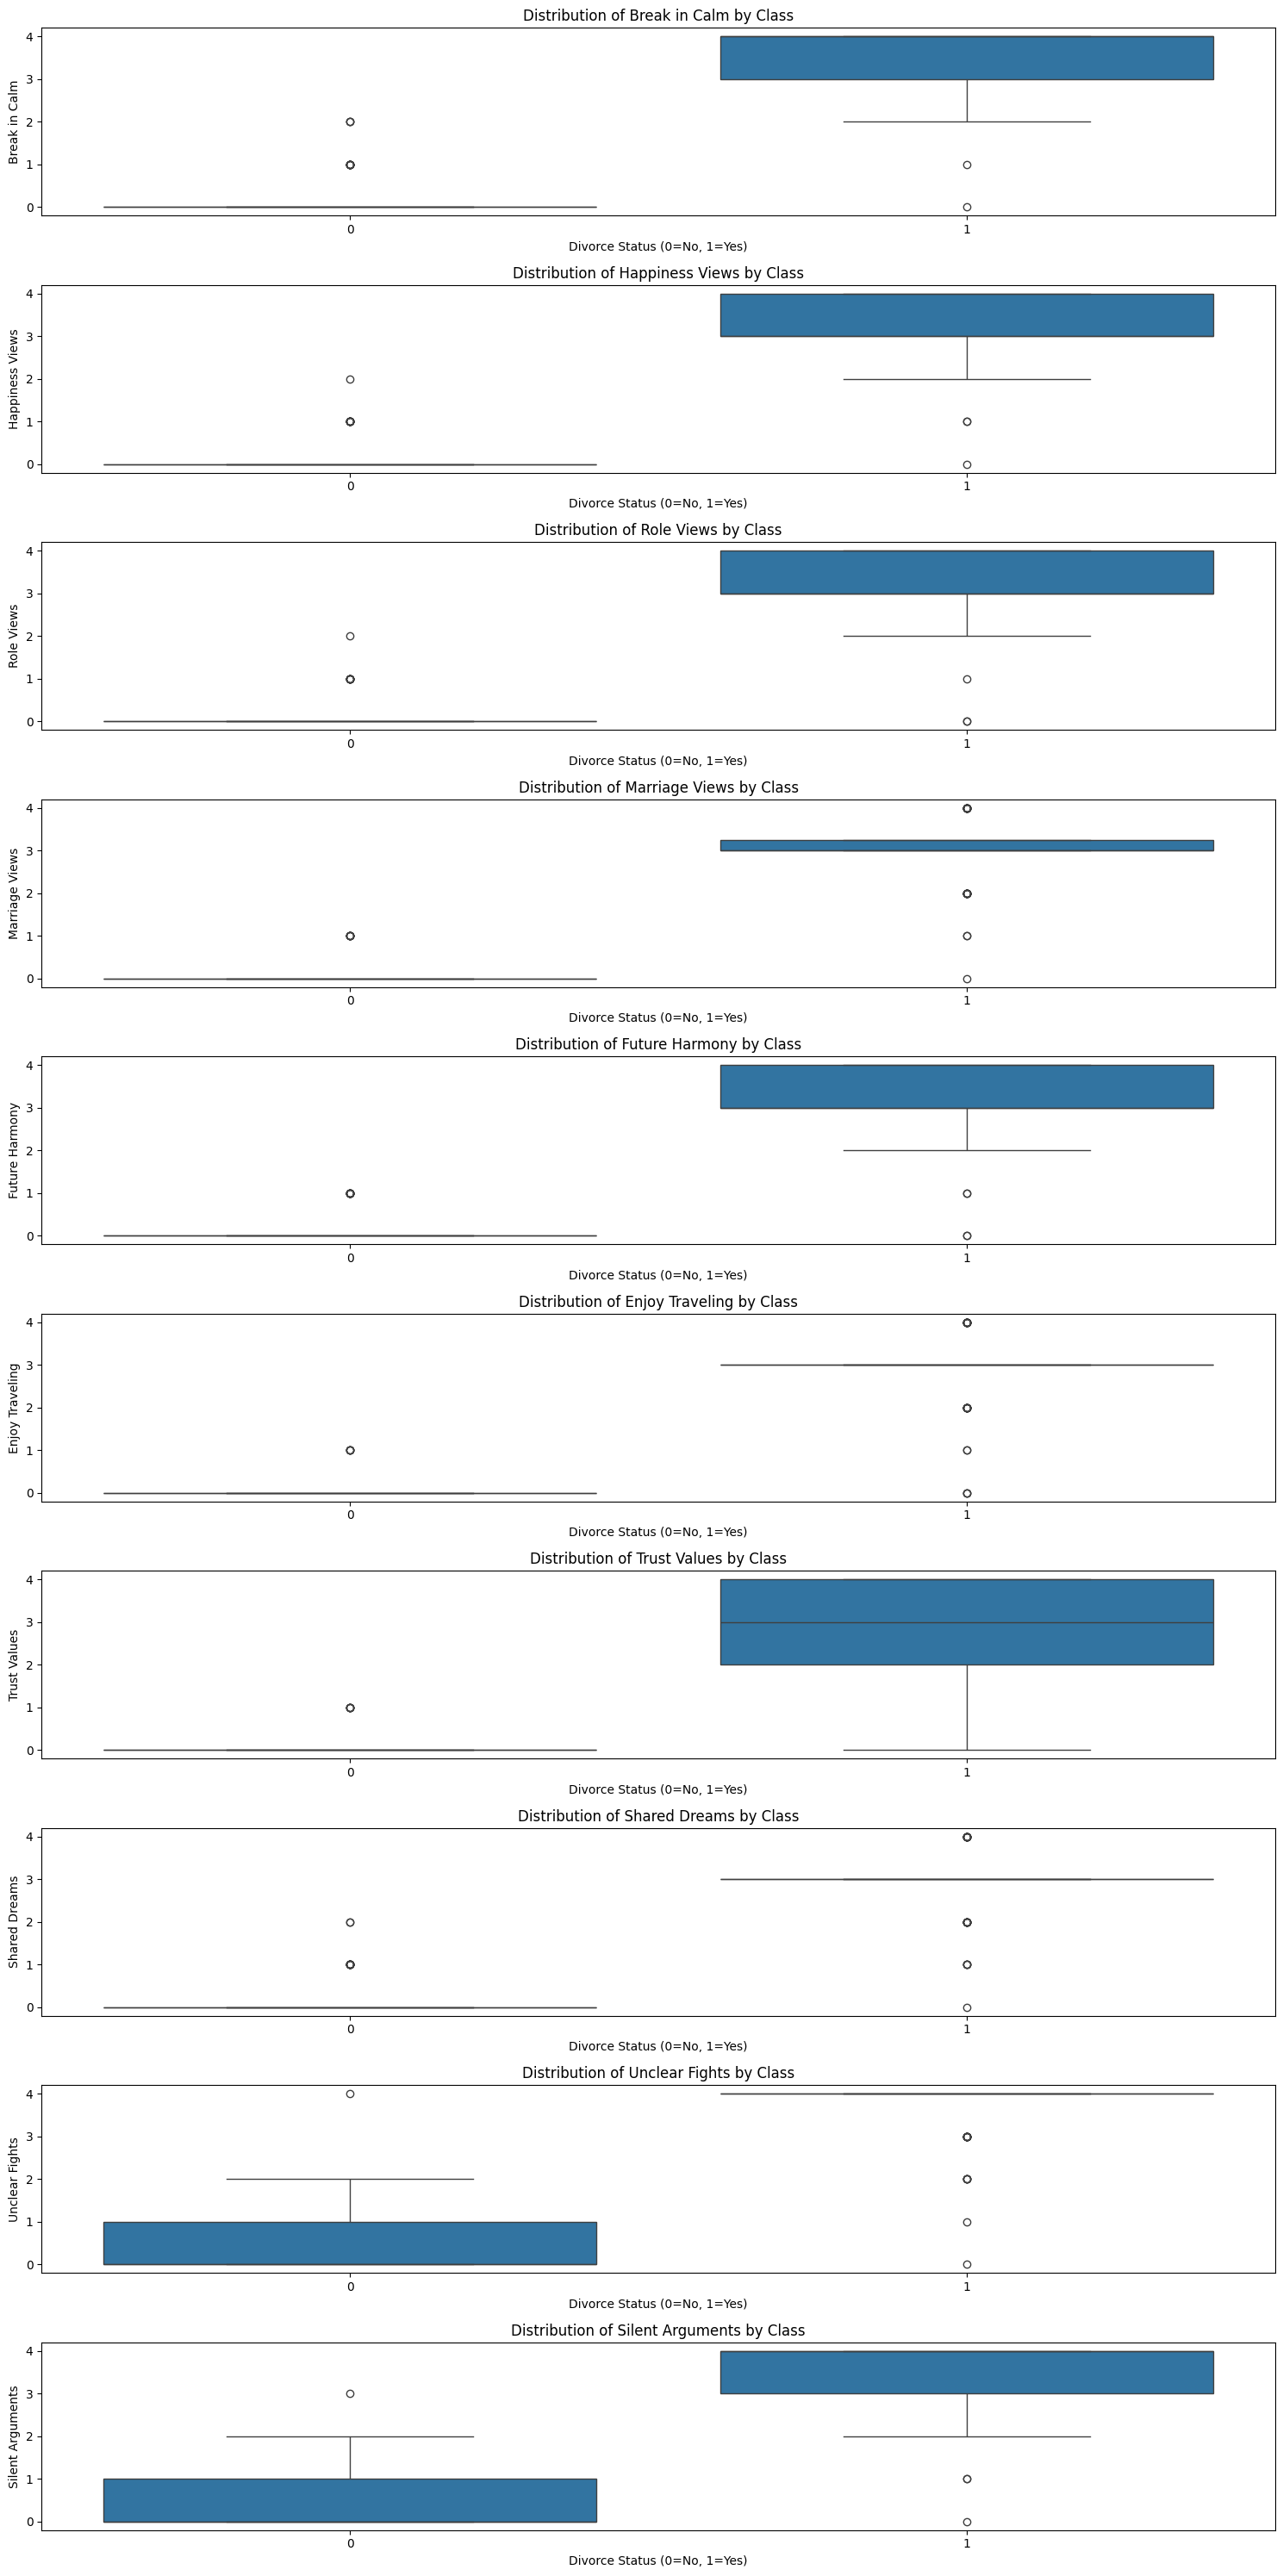

In [ ]:
# Get the names of the top 10 features from the previous output
top_10_feature_names = top_10_features.index.tolist()

# Create box plots for the top 10 features, separated by 'Class'
plt.figure(figsize=(15, len(top_10_feature_names) * 3)) # Adjust figure size dynamically
for i, col in enumerate(top_10_feature_names):
    plt.subplot(len(top_10_feature_names), 1, i + 1)
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f'Distribution of {col} by Class')
    plt.xlabel('Divorce Status (0=No, 1=Yes)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# **Dividing Dataset**
Under this section
- The target variable is seprated from the remaining features.

- The Dataset is splitted into 20% testing set and 80% Training Set

In [ ]:
# Separate features and target
X = df.drop(columns=["Class"])
y = df["Class"]

print("Data shape:", df.shape)
print("Class balance:\n", y.value_counts())
# Time the split operation for reporting
t0 = time.perf_counter()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
split_time_sec = time.perf_counter() - t0
print(f"Split Time (s): {split_time_sec:.6f}")


Data shape: (170, 55)
Class balance:
 Class
0    86
1    84
Name: count, dtype: int64
Split Time (s): 0.005134


# **Defining models for Machine Learning**
Machine Learning models are defined in this section
- Logistic Regression
- Random Forest
- Decision Tree
- Naive Bayes
- KNN

In [ ]:
# Use scaling for LR and KNN; trees and NB typically don't need scaling
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=500, random_state=42))
    ]),
    "Random Forest": Pipeline([
        ("clf", RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
    ]),
    "Decision Tree": Pipeline([
        ("clf", DecisionTreeClassifier(random_state=42))
    ]),
    "Naive Bayes (Gaussian)": Pipeline([
        ("clf", GaussianNB())
    ]),
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=7))
    ]),
}


# **Setting up function for Evaluation**

In [ ]:
def proba_or_score(est, X):
    """
    Return positive-class probabilities when available (predict_proba),
    else a min-max scaled decision_function, else predictions as floats.
    """
    if hasattr(est, "predict_proba"):
        p = est.predict_proba(X)
        return p[:, 1] if p.ndim == 2 else p.ravel()
    if hasattr(est, "decision_function"):
        s = est.decision_function(X)
        s = (s - s.min()) / (s.max() - s.min() + 1e-12)
        return s
    return est.predict(X).astype(float)

def plot_roc(y_true, y_score, title):
    """Plot ROC curve and return AUC."""
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_val = roc_auc_score(y_true, y_score)
    plt.figure(figsize=(4.8, 4.0))
    plt.plot(fpr, tpr, label=f"AUC = {auc_val:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.title(title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
    return auc_val

def plot_confusion(cm, title):
    """Plot a 2x2 confusion matrix (pure matplotlib; default colormap)."""
    plt.figure(figsize=(4.4, 3.8))
    plt.imshow(cm)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks([0, 1], ["0", "1"])
    plt.yticks([0, 1], ["0", "1"])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), ha="center", va="center")
    plt.tight_layout()
    plt.show()


# **Evaluating the Models**
The following functions are performed here
- Creation of ROC curve for all models
- Creation of Confusion Matrix for all models
- Creation of Evaluation Matrix for all models
- Creation of Train Time and Split Time

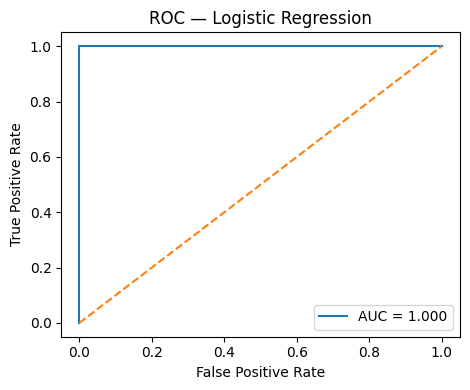

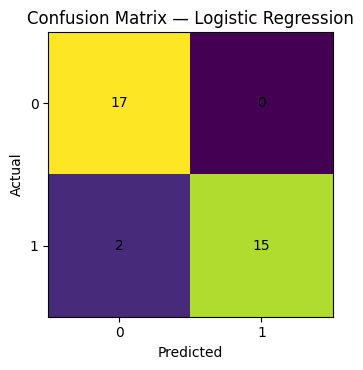

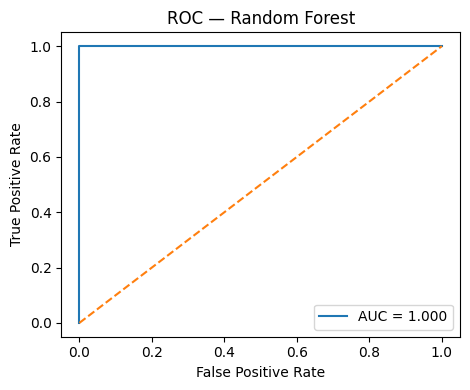

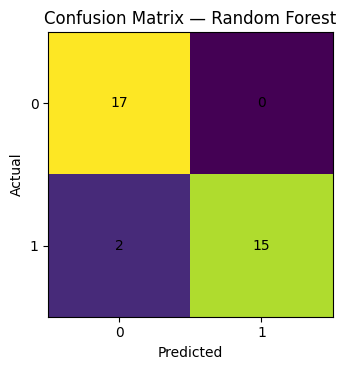

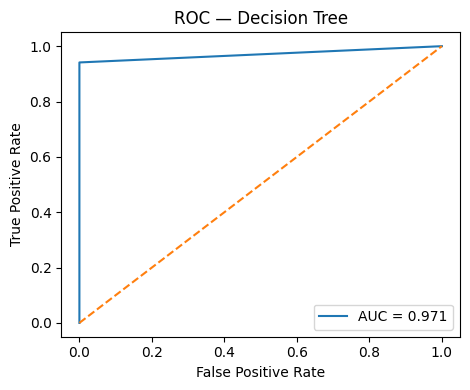

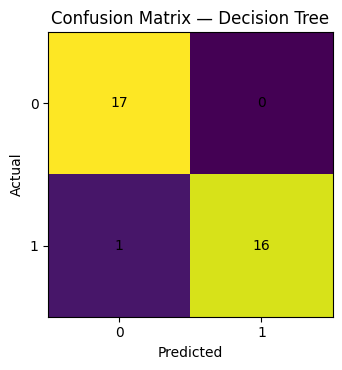

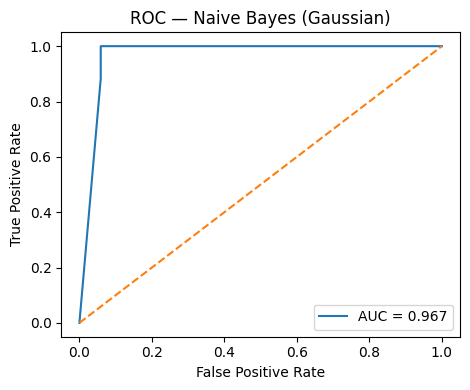

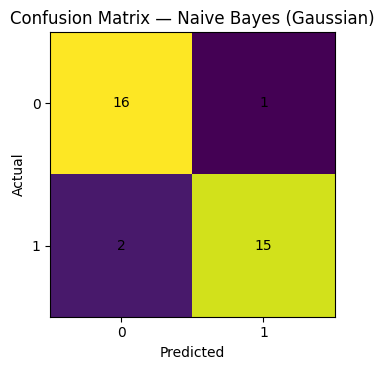

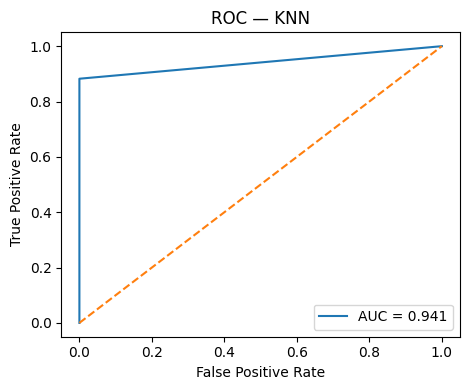

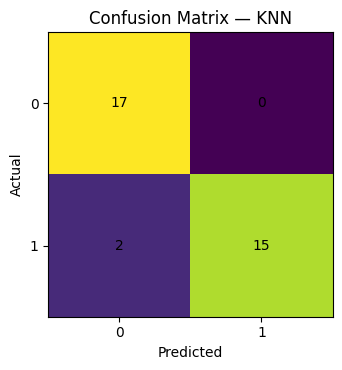


Model Performance Summary
                 Model  Split Time (s)  Train Time (s)  Test ROC AUC  Accuracy  Precision   Recall       F1
   Logistic Regression        0.005134        0.024438      1.000000  0.941176     1.0000 0.882353 0.937500
         Random Forest        0.005134        0.641795      1.000000  0.941176     1.0000 0.882353 0.937500
         Decision Tree        0.005134        0.003663      0.970588  0.970588     1.0000 0.941176 0.969697
Naive Bayes (Gaussian)        0.005134        0.003688      0.967128  0.911765     0.9375 0.882353 0.909091
                   KNN        0.005134        0.006072      0.941176  0.941176     1.0000 0.882353 0.937500


In [ ]:
rows = []

for name, pipe in models.items():
    # Train with timing
    tfit = time.perf_counter()
    pipe.fit(X_train, y_train)
    train_time_sec = time.perf_counter() - tfit

    # Scores for ROC and predictions for metrics
    y_score = proba_or_score(pipe, X_test)
    y_pred  = pipe.predict(X_test)

    # Metrics
    auc  = roc_auc_score(y_test, y_score)
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)

    # Plots: ROC + confusion matrix (one per model)
    plot_roc(y_test, y_score, f"ROC — {name}")
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    plot_confusion(cm, f"Confusion Matrix — {name}")

    rows.append({
        "Model": name,
        "Split Time (s)": round(split_time_sec, 6),
        "Train Time (s)": round(train_time_sec, 6),
        "Test ROC AUC":   round(auc, 6),
        "Accuracy":       round(acc, 6),
        "Precision":      round(prec, 6),
        "Recall":         round(rec, 6),
        "F1":             round(f1, 6),
    })

summary = pd.DataFrame(rows).sort_values("Test ROC AUC", ascending=False).reset_index(drop=True)
print("\nModel Performance Summary")
print(summary.to_string(index=False))


# **Cross Validation**
Cross validation is performed on best model using Monte-Carlo Style. Monte-Carlo (Stratified Shuffle Split) cross-validation repeatedly creates random, stratified train/test splits to estimate performance and its variability without fixing fold boundaries.

In [ ]:
# Monte-Carlo style CV: 20 random stratified re-splits (test_size=0.2)
sss = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=42)

results_mc = []
per_model_scores_mc = {}

for name, model in models.items():
    cv_res = cross_validate(
        model, X, y,
        scoring={"roc_auc": "roc_auc", "accuracy": "accuracy"},
        cv=sss, n_jobs=-1, return_train_score=False
    )
    per_model_scores_mc[name] = cv_res
    results_mc.append({
        "Model": name,
        "ROC AUC (mean)": np.mean(cv_res["test_roc_auc"]),
        "ROC AUC (std)":  np.std(cv_res["test_roc_auc"]),
        "Accuracy (mean)": np.mean(cv_res["test_accuracy"]),
        "Accuracy (std)":  np.std(cv_res["test_accuracy"])
    })

summary_mc = pd.DataFrame(results_mc).sort_values("ROC AUC (mean)", ascending=False).reset_index(drop=True)
print("\nMonte-Carlo CV Summary (20× Stratified Shuffle Split)")
print(summary_mc.to_string(index=False))

# Pick the Monte-Carlo winner and show its per-split details
best_name_mc = summary_mc.loc[0, "Model"]
best_cv_mc = per_model_scores_mc[best_name_mc]
best_df_mc = pd.DataFrame(best_cv_mc)[["test_roc_auc","test_accuracy","fit_time","score_time"]]
print(f"\nBest by Monte-Carlo ROC AUC: {best_name_mc}")
print("\nPer-split scores for Monte-Carlo best model:")
print(best_df_mc.to_string(index=False))



Monte-Carlo CV Summary (20× Stratified Shuffle Split)
                 Model  ROC AUC (mean)  ROC AUC (std)  Accuracy (mean)  Accuracy (std)
   Logistic Regression        0.999654       0.001038         0.977941        0.026100
         Random Forest        0.999221       0.001932         0.975000        0.025086
Naive Bayes (Gaussian)        0.993772       0.012469         0.970588        0.029412
                   KNN        0.979239       0.026533         0.975000        0.025086
         Decision Tree        0.970588       0.038348         0.970588        0.038348

Best by Monte-Carlo ROC AUC: Logistic Regression

Per-split scores for Monte-Carlo best model:
 test_roc_auc  test_accuracy  fit_time  score_time
      1.00000       0.941176  0.015013    0.022646
      1.00000       0.970588  0.016409    0.011480
      1.00000       0.970588  0.012218    0.010191
      1.00000       0.970588  0.015519    0.010731
      1.00000       1.000000  0.017184    0.010318
      1.00000       1